# Creating a custom distribution

The `pyMultiFit` library stands on top of three templates,

1. `BaseDistribution`: For creating compatible statistical distributions, in **distributions** module.
2. `multi_base`: For generating multi-distribution data with given parameters, in **generators** module.
3. `BaseFitter`: For creating fitter functions for the said distributions, in **fitters** module.

In this tutorial, we will focus on ``BaseDistribution`` for generating a custom distribution.

## Custom distribution

The basic structure of `BaseDistribution` class is as follows:

In [1]:
# see BaseDistribution for more details at https://pymultifit.readthedocs.io/latest/distributions/baseDistribution.html
class BaseDistribution:
    """Mock Base Distribution skeletal class."""

    def pdf(self, x):
        """PDF implementation."""
        pass

    def cdf(self, x):
        """CDF implementation."""
        pass

    def stats(self):
        """Statistics implementation."""
        pass

Which gives just enough boilerplate code for users to be able to make their own custom distributions. For example, let's say we want to make an Exponential distribution with a **PDF** function

$$
f(x\ |\ \lambda) = \lambda\exp\left[-\lambda x\right],
$$

the **CDF** function,

$$
F(x) = 1 - \exp\left[-\lambda x\right],
$$

and only its mean as the stats, $\mu_\text{expon} = 1/\lambda$. We can do this by using our custom class as the base.

<div class="alert alert-block alert-info"> 
Although not necessary, it is recommended to at least make a separate function for <strong>PDF</strong> before incorporating it into the custom class. It is better if both <strong>PDF</strong> and <strong>CDF</strong> are kept separate.</div>

In [2]:
import numpy as np


def exp_pdf(x, lambda_, normalize: bool = False):
    """Exponential PDF."""
    return lambda_ * np.exp(-lambda_ * x)


def exp_cdf(x, lambda_, normalize: bool = False):
    """Exponential CDF."""
    return 1 - np.exp(-lambda_ * x)


class Exponential(BaseDistribution):
    """Mock Exponential distribution."""

    def __init__(self, lambda_: float = 1.0, normalize: bool = True):
        self.lambda_ = lambda_

        self.norm = normalize

    def pdf(self, x):
        return exp_pdf(x, self.lambda_, self.norm)

    def cdf(self, x):
        return exp_cdf(x, self.lambda_, self.norm)

    def stats(self):
        return {'mean': 1 / self.lambda_}

Let's break down what's going on here and why certain things are added here.

### `exp_pdf(x_, lambda_, normalize)`
Defines the exponential distribution **PDF** function. It contains two parameters,

1. `lambda_` or the scale parameter, often written as $\lambda$.
2. `normalize` keyword, for normalization of the generated values.

While not directly used here, the `normalize` keyword is internally utilized to determine if the distribution remains normalized.
Since `pyMultiFit` supports both normalized and un-normalized distributions, it is recommended to include this keyword in your functions and classes to maintain API consistency.

### `exp_cdf(x_, lambda_, normalize)`
Defines the exponential distribution **CDF** function. Similar structure to `exp_pdf` to ensure API consistency.

### `stats()`
Within the defined class, we give the distribution statistics to the user via the `stats()` method of the class.
The user can define any statistics here, mean, median, mode, variance, standard deviation, skewness, etcetera.
The `pyMultiFit` distribution only defines four, mean, median, mode and variance.

### Testing

Now that we've defined our distribution, we can do a little testing with it. Let's plot three exponential distributions with $\lambda \in [0.5, 1, 1.5]$.

In [3]:
exp_point3 = Exponential(lambda_=0.5)
exp_1 = Exponential(lambda_=1)
exp_onePoint3 = Exponential(lambda_=1.5)

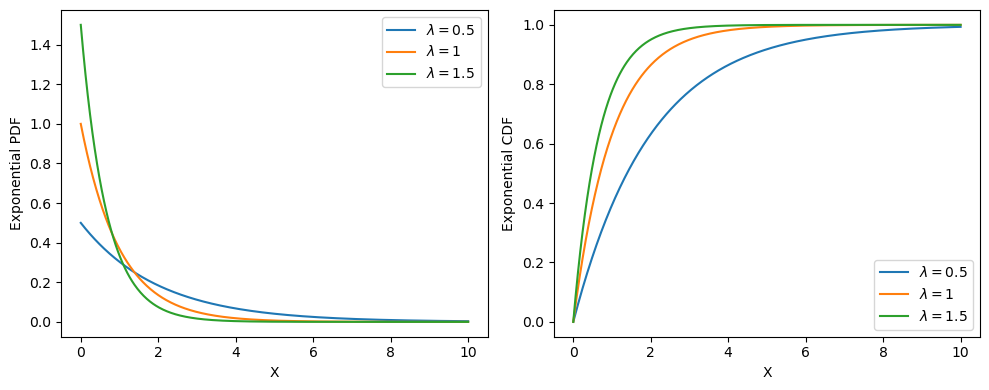

In [4]:
import matplotlib.pyplot as plt

x_values = np.linspace(0, 10, 500)

dists_ = [exp_point3, exp_1, exp_onePoint3]
labels_ = ['0.5', '1', '1.5']

# take two subplots to add both PDF and CDF
f, ax = plt.subplots(1, 2, figsize=(10, 4))

for index, value in enumerate(['pdf', 'cdf']):
    for i, j in zip(dists_, labels_):
        ax[index].plot(x_values, i.pdf(x_values) if value == 'pdf' else i.cdf(x_values),
                       label=r'$\lambda = $' + f'{j}')

[i.set_xlabel('X') for i in ax]
ax[0].set_ylabel('Exponential PDF')
ax[1].set_ylabel('Exponential CDF')
[i.legend(loc='best') for i in ax]
plt.tight_layout()
plt.show()

Okay, that was easy. But this could also have been done with only defining the **PDF** and **CDF** functions separately and using them. What's the point here?

That's what we'll see in the upcoming tutorials.